<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QFT_00_ChatGPT_mkbahk_20250423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 20.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5f6a822f0cfd3acc5b002d31d5a312debb9aef4dfede8e735541c9954de4eb6c
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 115.9 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-9vpwfydv
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qisk

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np

이 코드는 3큐비트 QFT를 구현하며,∣001⟩ 진폭(Amplitude, 타임도메인으로 생각)상태를 중첩된 주파수 도메인(위상Phase 도메인) 상태로 변환합니다.<br>Qiskit의 모듈화된 구조를 활용해 회로 생성, QFT 적용, 시뮬레이션을 수행하며,
<br>양자컴퓨팅의 핵심 알고리즘을 실습적으로 이해할 수 있습니다.

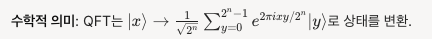

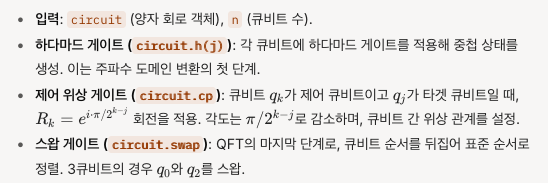

In [3]:
# 3큐비트 QFT 함수 정의
def qft(circuit, n):
    """n개의 큐비트에 대해 QFT를 적용하는 함수"""
    for j in range(n):
        # 현재 큐비트에 하다마드 게이트 적용
        circuit.h(j)
        # 제어 회전 게이트 추가
        for k in range(j + 1, n):
            angle = np.pi / (2 ** (k - j))
            circuit.cp(angle, k, j)
        ###for
    ###for

    # 큐비트 순서 뒤집기 (스왑)
    for j in range(n // 2):
        circuit.swap(j, n - 1 - j)
    ###for
###def

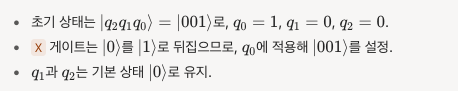

In [4]:
# 3큐비트 회로 생성
n_qubits = 4 # 3 ~ 9까지 늘려보세요.
qc = QuantumCircuit(n_qubits, n_qubits)

# 초기 상태 |001> 설정 (q0=1, q1=0, q2=0)
qc.x(0)  # q0에 X 게이트 적용
qc.barrier()

# QFT 적용
qft(qc, n_qubits)
#qc.barrier()
# 측정을 위해 큐비트별 고전 비트 추가
qc.measure_all() #_all()은 자동적으로 barrier추가


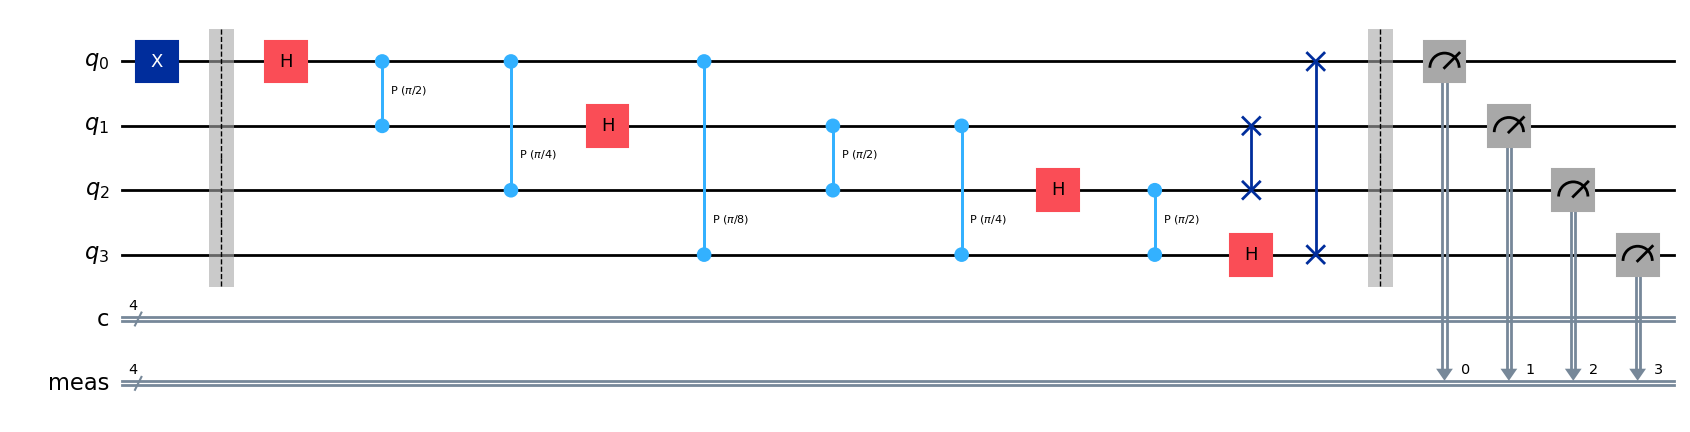

In [5]:
qc.draw('mpl')

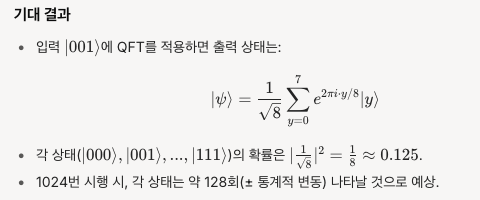

In [15]:
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

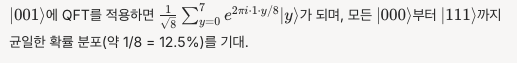

In [16]:
print(counts)

{'1110 0000': 56, '0110 0000': 81, '1101 0000': 72, '1011 0000': 56, '0100 0000': 63, '0000 0000': 60, '0001 0000': 68, '1111 0000': 80, '1001 0000': 64, '1000 0000': 74, '0101 0000': 63, '0010 0000': 61, '0011 0000': 48, '1100 0000': 56, '1010 0000': 68, '0111 0000': 54}


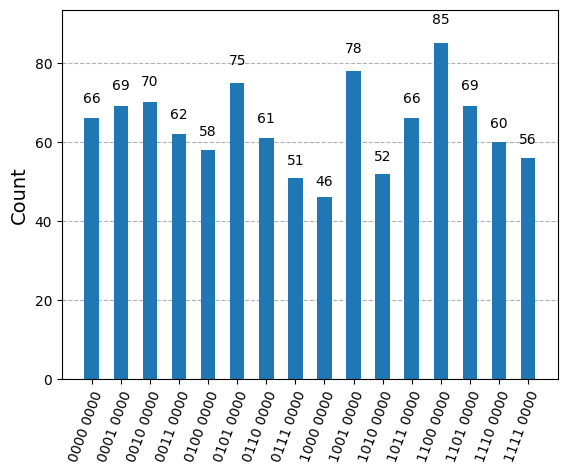

In [8]:
plot_histogram(counts)

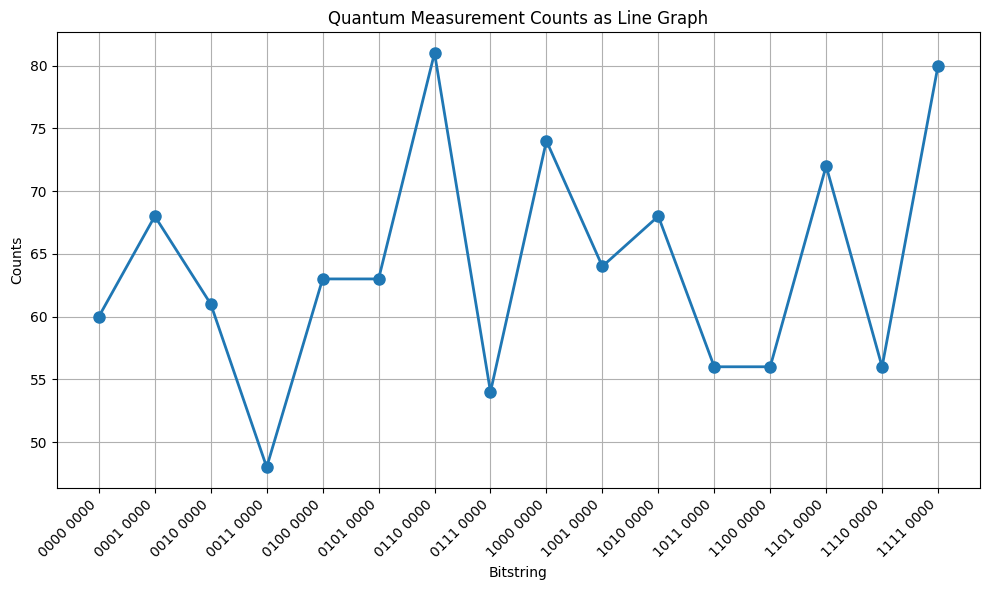

In [21]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import OrderedDict  # 정렬된 딕셔너리 사용

#비트스트링을 이진수 값으로 정렬 (첫 4비트만 고려, 뒤 4비트는 '0000'으로 고정)
sorted_keys = sorted(counts.keys(), key=lambda x: int(x[:4], 2))
values = [counts[key] for key in sorted_keys]

# 선 그래프 플롯
plt.figure(figsize=(10, 6))
plt.plot(sorted_keys, values, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Bitstring')
plt.ylabel('Counts')
plt.title('Quantum Measurement Counts as Line Graph')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()